# Linear regression practical
By Dominic Waithe 2018. Updated (2019).

This is a Jupyter notebook. Each cell represents a different python script. Variables which are assigned are accessible from all the cells. As as consequence of this, the order and the number of times a cell is run can be important as variables can be changed multiple times.

- To run a cell, click the cell and press "shift-enter" on your keyboard. Alternatively, click the ">|" button above or click "Run" from the "Cell" menu.


[[ 1.         -0.80124465]
 [-0.80124465  1.        ]]
corr -0.8012446509407865
r2 0.6419929906612227


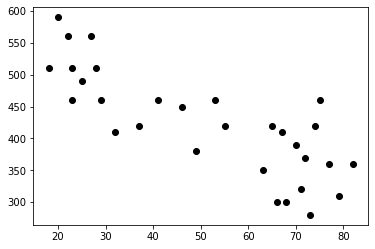

In [1]:
#Please run this cell you will need it later.
#It loads in the functions necessary for this practical.
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

#This is a simple numpy implementation of the correlation function.
def correlation(data1, data2):
    "data1 & data2 should be numpy arrays."
    mean1 = data1.mean() 
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr



#Here is some data. [[x0,y0],[x1,y1],[x2,y2],...,[xn,yn]]
data = [[18,  510],[20,  590],[22,  560],[23,  510],[23,  460],[25,  490],[27,  560],[28,  510],
[29,  460],[32,  410],[37,  420],[41,  460],[46,  450],[49,  380],[53,  460],[55,  420],[63,  350],
[65,  420],[66,  300],[67,  410],[68,  300],[70,  390],[71,  320],[72,  370],[73,  280],[74,  420],
[75,  460],[77,  360],[79,  310],[82,  360]]
x = np.array(data)[:,0]
y = np.array(data)[:,1]
#How to plot data like this.
plt.plot(x,y,'ko')
#TODO: calculate the correlation value for this data. Would we apply linear regression on this data?
print(np.corrcoef(x,y))
corr = correlation(x,y)
print('corr',corr)
print('r2',corr**2)



### This is the analytical solution for solving simple linear regression.

In [ ]:

data = np.array([[18,  510],[20,  590],[22,  560],[23,  510],[23,  460],[25,  490],[27,  560],[28,  510],
[29,  460],[32,  410],[37,  420],[41,  460],[46,  450],[49,  380],[53,  460],[55,  420],[63,  350],
[65,  420],[66,  300],[67,  410],[68,  300],[70,  390],[71,  320],[72,  370],[73,  280],[74,  420],
[75,  460],[77,  360],[79,  310],[82,  360]])
n = data.shape[0]
x = data[:,0]
y = data[:,1]
#Using the expanded equations from the notes.
# equation (1).
b0 = (np.average(y)*(np.sum(x**2))-np.average(x)*np.sum(x*y))/(np.sum(x**2)-n*np.average(x)**2)
print('b0',b0) 
# equation (2).
b1 = ((np.sum(x*y))-n*np.average(x)*np.average(y))/(np.sum(x**2)-n*np.average(x)**2)
print('b1',b1)
#visualisation
xx = np.linspace(np.min(x),np.max(x),2)
yy = np.array(b0+ b1 * xx)
plt.plot(xx,yy,'-',color='pink')
plt.scatter(data[:,0], data[:,1],color='k')
plt.title("XY plot comparing the independent variable and the dependent variable ")
plt.xlabel("Independent variable (x)")
plt.ylabel("Dependent variable (y)")
#You could do it for higher dimension input data (i.e. 3D or nD data, but the equations get very long!!!!).

#TODO: Load the interactive demonstration:
#http://userweb.molbiol.ox.ac.uk/dwaithe/WIMM_Advanced_Imaging/linearRegressiond4.html
#Can you get the same parameters as the fit. Do you agree with the choice? 
#Bonus: Calculate the error. Is it the same as in the demonstration? Can you get lower. This is quite challenging so
#you can skip this bonus challenge if you like.

### This is the generalisable solution for solving linear regression.

In [ ]:

data = np.array([[18,  510],[20,  590],[22,  560],[23,  510],[23,  460],[25,  490],[27,  560],[28,  510],
[29,  460],[32,  410],[37,  420],[41,  460],[46,  450],[49,  380],[53,  460],[55,  420],[63,  350],
[65,  420],[66,  300],[67,  410],[68,  300],[70,  390],[71,  320],[72,  370],[73,  280],[74,  420],
[75,  460],[77,  360],[79,  310],[82,  360]])
n = data.shape[0]
#(X'X) This is equivalent to the matrix [[n,np.sum(x)],[np.sum(x),np.sum(x**2)]]
X = np.array([np.ones(n),data[:,0]]).T
XtX = X.T.dot(X) #left side of equation (3)
#(X'Y) This is equivalent to the matrix [[np.sum(y)],[np.sum(x*y)]]
y = np.array(data[:,1])
XtY = X.T.dot(y) #right side of equation (4)

#This is equation (4) the solve bit does the inversion. It does the hard work!
beta = np.linalg.solve(XtX,XtY)
#Above can involve a lot of memory if they are high in dimension.

#TODO: print the output paramaters and visualise the data.
#Should give the same answer as above :-).



### A more realistic dataset.

In [ ]:
#TODO. 
#Download some data and fit it using the linear regression methods above.
#e.g. sklearn.datasets.load_diabetes(return_X_y=False)
#https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset
import sklearn.datasets
a = sklearn.datasets.load_diabetes(return_X_y=False)
#Just plot two variables at a time.
#calculate the correlation for each of the independent variables with respect to the dependent.
for num in range(0,a['data'].shape[1]):
    print(a['feature_names'][num],'vs dependent',correlation(a['data'][:,num],a['target']))
#Find the most correlated and fit a line to it.
#measure the correlation
#Make a figure, label the axis, and give it a title.


In [ ]:
a['feature_names']

### Higher dimension multiple linear regression

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
#### This is the generalisable solution for solving linear regression.
###In this case optimised for 3-D data.

#We reformat our data a little bit. Notice where the extra has gone.
x_nD = np.array([[1,2,3,4,5,6],[3,7,10,5,4,3]])

y = np.array([6,5,7,7,8,9.5])
n = y.shape[0]

#(X'X) Notice the extra column.
X = np.array([np.ones(n),x_nD[0],x_nD[1]]).T
XtX = X.T.dot(X)
#(X'Y) 
y = np.array(y)
XtY = X.T.dot(y)
beta = np.linalg.solve(XtX,XtY)#This does the hard work! 
#Above can involve a lot of memory if they are high in dimension.

#print the paramters of our line.
print('b0',beta[0])
print('b1',beta[1])
print('b2',beta[2])



#Visualise the plane which we fit in the case of two independent and one denpendent variables.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ax.scatter(x_nD[0], x_nD[1], y, zdir='z', s=20, c=None, depthshade=True)
x = y = np.arange(np.min(x_nD), np.max(x_nD), 0.05)
x0, x1 = np.meshgrid(x, y)
Z = np.array(beta[0]+ beta[1] * x0 + beta[2]*x1)


ax.plot_surface(x0,x1,Z,color='red')
plt.title("XYZ plot comparing two independent variables and the dependent variable ")
plt.xlabel("Independent variable (x0)")
plt.ylabel("Independent variable (x1)")

In [ ]:
#TODO:

#Can you see how the above code could be changed to make it work in 4-D or more?
#Try and create code which works for dimensions of the  diabetes data. 
#You won't be able to visualise the output as a graph.


#print the parameters of your line.
print('b0',beta[0])
print('b1',beta[1])
print('b2',beta[2])
#print('b3',beta[3])
#print('b4',beta[4])
#print('b5',beta[5])
#How can you check if your method is working correctly?

### Stochastic gradient descent as an alternative optimisation.

In [ ]:
from sklearn.linear_model import SGDRegressor
import time
#How about if we add lots of data now.
x_nD = np.array(np.random.random((100000,2)))
y = x_nD[:,0]*9.0+x_nD[:,1]
SGDRegressor(loss="squared_loss")
clf = SGDRegressor()

X0 = x_nD[:,0].reshape(1,-1)*5.0  # SGDRegressor is very particular on input "X" and insists on a true matrix 
y0 = y.tolist()

t1 = time.time()
clf.fit(X0.T,y0)#Stochastic Gradient Descent approach.
t0 = time.time()
print(t0-t1,"ms SGD iterative method.")

n = x_nD.shape[0]

t1 = time.time()
#(X'X) This is equivalent to the matrix [[n,np.sum(x)],[np.sum(x),np.sum(x**2)]]
X = np.array([np.ones(n),x_nD[:,0]*5.0]).T
XtX = X.T.dot(X)
#(X'Y) This is equivalent to the matrix [[np.sum(y)],[np.sum(x*y)]]
y = np.array(y0).reshape(-1,1)
XtY = X.T.dot(y)
beta = np.linalg.solve(XtX,XtY)#Analytical linear algebra approach.
t0 = time.time()
print(t0-t1,"ms analytical least squares method.")
#Your previous analytical method can involve a lot of memory if the arrays are very long and high in dimension.
#At this size of data however, at low dimension, it is very fast compared SGD.


print('b0',clf.intercept_[0],'iterative')
print('b1',clf.coef_[0],'iterative')
print('b0',beta[0][0],'analytical')
print('b1',beta[1][0],'analytical')


plt.plot(X0[0],y0,'o')
xx = np.linspace(0,5,2)
yy = np.array(clf.intercept_+ clf.coef_[0] * xx)
plt.plot(xx,yy.T,color='b')
yy = np.array(beta[0]+ beta[1] * xx)
plt.plot(xx,yy.T,color='r')
###Which is faster???



In [ ]:
###TODO. sklearn has a dedicated least squares solver for solving linear regression problems. 
###Find this function and test it on the above data and your diabetes data. Which method is fastest?